Twos split lengths:
22
22
22
Value counts after replacement:
0.0    25
1.0    33
2.0    33
3.0    32
4.0    22
5.0    22
6.0    22
7.0    65
Name: 4_water, dtype: int64


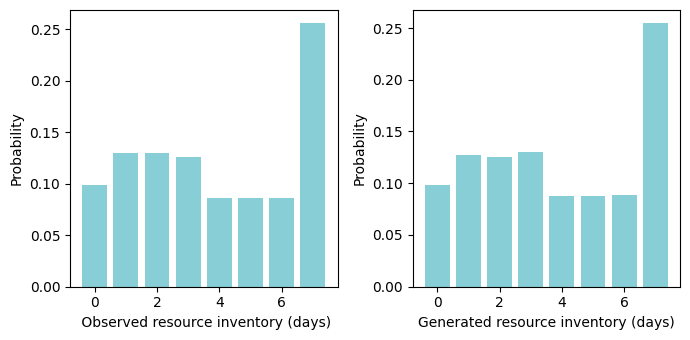

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = "data/laurelhurst_survey_with_address.csv"
all_residents_file = "data/laurelhurst_address.csv"

df = pd.read_csv(file_path)
all_residents_df = pd.read_csv(all_residents_file)

columns_to_process = ['4_water']

df = df[df[columns_to_process[0]] != 4]

# replace values
def replace_based_on_value(df, column):
    ones = df[df[column] == 1].index.tolist()
    twos = df[df[column] == 2].index.tolist()
    threes = df[df[column] == 3].index.tolist()
    
    np.random.shuffle(ones)
    np.random.shuffle(twos)
    
    ones_split = np.array_split(ones, 3)
    twos_split = np.array_split(twos, 3)
    
    df.loc[ones_split[0], column] = 1
    df.loc[ones_split[1], column] = 2
    df.loc[ones_split[2], column] = 3
    
    df.loc[twos_split[0], column] = 4
    df.loc[twos_split[1], column] = 5
    df.loc[twos_split[2], column] = 6
    
    print("Twos split lengths:")
    print(len(twos_split[0]))
    print(len(twos_split[1]))
    print(len(twos_split[2]))
    
    df.loc[threes, column] = 7

replace_based_on_value(df, columns_to_process[0])

# Calculate probabilities
value_counts = df[columns_to_process[0]].value_counts().sort_index()
total_counts = value_counts.sum()
probabilities = value_counts / total_counts
print("Value counts after replacement:")
print(value_counts)

# Generate data based on probabilities
for column in columns_to_process:
    column_data = df[column]

    full_series = pd.Series(np.nan, index=np.arange(len(all_residents_df)))

    full_series.iloc[:len(column_data)] = column_data

    original_values = column_data.dropna().values
    repeated_values = np.tile(original_values, (len(all_residents_df) // len(original_values)) + 1)
    np.random.shuffle(repeated_values)
    full_series = pd.Series(repeated_values[:len(all_residents_df)])
  
    all_residents_df[column + '_new'] = full_series

# Calculate the new probabilities
value_counts_new = all_residents_df['4_water_new'].value_counts().sort_index()
total_counts_new = value_counts_new.sum()
probabilities_new = value_counts_new / total_counts_new

fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))


# Original data distribution
axes[0].bar(probabilities.index, probabilities, color='#88ced6')
# axes[0].bar(probabilities.index, probabilities, color='#DDA0DD')
axes[0].set_xlabel(' Observed resource inventory (days)')
axes[0].set_ylabel('Probability')

# Generated data distribution
# axes[1].bar(probabilities_new.index, probabilities_new, color='#DDA0DD')
axes[1].bar(probabilities_new.index, probabilities_new, color='#88ced6')
axes[1].set_xlabel('Generated resource inventory (days)')
axes[1].set_ylabel('Probability')

plt.tight_layout()
plt.show()


In [7]:
ind = np.arange(1, 5)
# print(ind)

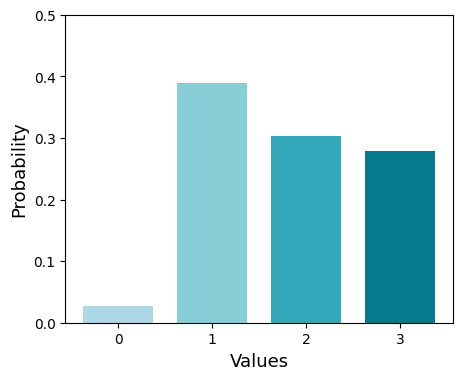

In [21]:
import matplotlib.pyplot as plt

# Given data
values = [0.0, 1.0, 2.0, 3.0]
probabilities = [0.027559, 0.389764, 0.303150, 0.279528]
colors = ['#ADD8E6', '#88ced6', '#33a8ba', '#07798c']

# Create a bar plot
fig, ax = plt.subplots(figsize=(5, 4))

# Plotting the bars
bars = ax.bar(values, probabilities, color=colors, width=0.75)

# Adding labels and title
ax.set_xlabel('Values', fontsize=13)
ax.set_ylabel('Probability', fontsize=13)
# ax.set_title('Probability Distribution', fontsize=16)

# Setting x-ticks at each bar
ax.set_xticks(values)
ax.tick_params(axis='x', direction='out')

# Setting y-ticks
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4,0.5])
ax.set_ylim(0, 0.5)

# Display the plot
plt.show()


0.0    0.027559
1.0    0.389764
2.0    0.303150
3.0    0.279528
Name: 7_water, dtype: float64


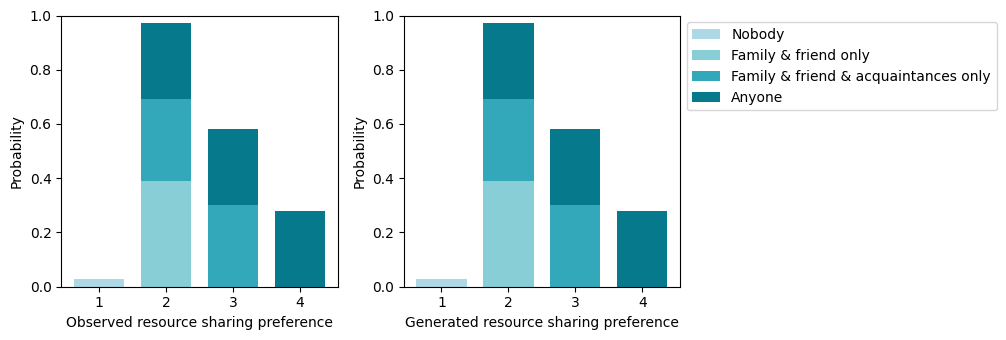

In [8]:
width = 0.75
columns_to_process = ['7_water']

# Calculate probabilities
value_counts = df[columns_to_process[0]].value_counts().sort_index()
total_counts = value_counts.sum()
probabilities = value_counts / total_counts
print(probabilities)
# Generate data based on the original distribution
for column in columns_to_process:
    column_data = df[column]

    full_series = pd.Series(np.nan, index=np.arange(len(all_residents_df)))

    full_series.iloc[:len(column_data)] = column_data

    original_values = column_data.dropna().values
    repeated_values = np.tile(original_values, (len(all_residents_df) // len(original_values)) + 1)
    np.random.shuffle(repeated_values)
    full_series = pd.Series(repeated_values[:len(all_residents_df)])

    all_residents_df[column + '_new'] = full_series

# Calculate probabilities
value_counts_new = all_residents_df['7_water_new'].value_counts().sort_index()
total_counts_new = value_counts_new.sum()
probabilities_new = value_counts_new / total_counts_new

# colors = ['#FFF0F5','#D8BFD8', '#DDA0DD','#BA55D3']
colors = ['#ADD8E6', '#88ced6', '#33a8ba', '#07798c']

fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))

axes[0].bar(ind[0], probabilities.iloc[0], width, color=colors[0])
axes[0].bar(ind[1], probabilities.iloc[1], width, color=colors[1])
axes[0].bar(ind[1], probabilities.iloc[2], width, bottom=probabilities.iloc[1], color=colors[2])
axes[0].bar(ind[1], probabilities.iloc[3], width, bottom=probabilities.iloc[1] + probabilities.iloc[2], color=colors[3])

axes[0].bar(ind[2], probabilities_new.iloc[2], width, color=colors[2])
axes[0].bar(ind[2], probabilities_new.iloc[3], width, bottom=probabilities.iloc[2], color=colors[3])

axes[0].bar(ind[3], probabilities.iloc[3], width, color=colors[3])

axes[0].set_xlabel('Observed resource sharing preference')
axes[0].set_ylabel('Probability')

axes[0].set_ylim(0, 1)  

ind = np.arange(1, 5)  


axes[1].bar(ind[0], probabilities_new.iloc[0], width, color=colors[0], label='Nobody')
axes[1].bar(ind[1], probabilities_new.iloc[1], width, color=colors[1], label='Family & friend only')
axes[1].bar(ind[1], probabilities_new.iloc[2], width, bottom=probabilities_new.iloc[1], color=colors[2], label='Family & friend & acquaintances only')
axes[1].bar(ind[1], probabilities_new.iloc[3], width, bottom=probabilities_new.iloc[1] + probabilities_new.iloc[2], color=colors[3], label='Anyone')

axes[1].bar(ind[2], probabilities_new.iloc[2], width, color=colors[2])
axes[1].bar(ind[2], probabilities_new.iloc[3], width, bottom=probabilities_new.iloc[2], color=colors[3])

axes[1].bar(ind[3], probabilities_new.iloc[3], width, color=colors[3])

axes[1].set_xlabel('Generated resource sharing preference')
axes[1].set_ylabel('Probability')

axes[1].set_ylim(0, 1)  

axes[1].set_xticks(ind)
axes[1].set_xticklabels(['1', '2', '3', '4'])

plt.tight_layout()

axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


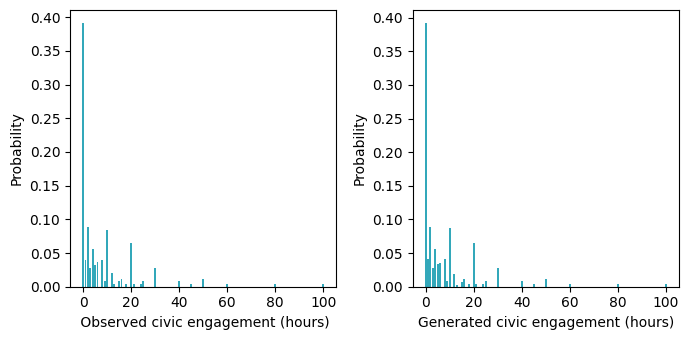

In [4]:
columns_to_process = ['11_hours']


# Calculate probabilities
value_counts = df[columns_to_process[0]].value_counts().sort_index()
total_counts = value_counts.sum()
probabilities = value_counts / total_counts

# generated data based on probabilities
for column in columns_to_process:
    column_data = df[column]

    full_series = pd.Series(np.nan, index=np.arange(len(all_residents_df)))

    full_series.iloc[:len(column_data)] = column_data

    original_values = column_data.dropna().values
    repeated_values = np.tile(original_values, (len(all_residents_df) // len(original_values)) + 1)
    np.random.shuffle(repeated_values)
    full_series = pd.Series(repeated_values[:len(all_residents_df)])

  
    all_residents_df[column + '_new'] = full_series

# Calculate the new probabilities
value_counts_new = all_residents_df['11_hours_new'].value_counts().sort_index()
total_counts_new = value_counts_new.sum()
probabilities_new = value_counts_new / total_counts_new


fig, axes = plt.subplots(1, 2, figsize=(7, 3.5))

# Original data distribution
axes[0].bar(probabilities.index, probabilities, color='#33a8ba')
axes[0].set_xlabel(' Observed civic engagement (hours)')
axes[0].set_ylabel('Probability')

# Generated data distribution
axes[1].bar(probabilities_new.index, probabilities_new, color='#33a8ba')
axes[1].set_xlabel('Generated civic engagement (hours)')
axes[1].set_ylabel('Probability')

plt.tight_layout()
plt.show()


In [5]:
survey_df =df

In [6]:
# create a list of columns to filter
cols_to_filter = ['10_a_fri', '10_a_acq', 
                  '10_b_fri', '10_b_acq',
                  '10_c_fri', '10_c_acq', 
                  '10_d_fri', '10_d_acq',
                  '10_e_fri', '10_e_acq', 
                  '10_f_fri', '10_f_acq',
                  '10_g_fri', '10_g_acq']

# convert non-numeric values to NaN
for col in cols_to_filter:
    survey_df[col] = pd.to_numeric(survey_df[col], errors='coerce')
# filter out rows with NaN values
clean_survey_df = survey_df.dropna(subset=cols_to_filter)
# reset the index
clean_survey_df.reset_index(drop=True, inplace=True)
clean_survey_df

,passcode,mode,1_cook,1_wash,1_health,1_warm,1_cool,1_safe,1_comm,1_transp,...,ID,CLUSTER,PIN,TAXPAYER NAME,ADDRESS,CITY,ZIP,latitude,longitude,area
0,36597,online,2.0,3.0,1.0,4.0,1.0,4.0,2,1.0,...,1279,74,4.221900e+09,YOUNG-SPARLING FAMILY TRUST,5127 47TH AVE NE,SEATTLE,98105,47.666871,-122.277676,A
1,36807,online,3.0,4.0,5.0,4.0,2.0,4.0,4,4.0,...,904,54,7.613701e+09,"BRUNNER HELEN J+CIMA,",4845 NE 41ST ST,SEATTLE,98105,47.658138,-122.274650,F
2,36971,online,5.0,3.0,3.0,5.0,1.0,3.0,3,4.0,...,268,17,7.230002e+08,WEIS ERIK,3803 40TH AVE NE,SEATTLE,98105,47.656788,-122.285200,D
3,37119,online,4.0,2.0,3.0,4.0,2.0,2.0,4,3.0,...,1783,96,1.525049e+09,VILLAGE MANOR LLC 21 UNITS,3821 NE 45TH ST APT 6,SEATTLE,98105,47.660865,-122.286084,C
4,35973,online,3.0,2.0,3.0,4.0,1.0,3.0,5,3.0,...,1184,70,3.977900e+09,HAYES CECIL E+JOYCE E,5229 IVANHOE PL NE,SEATTLE,98105,47.667251,-122.273151,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,36435,paper,4.0,5.0,3.0,4.0,3.0,2.0,3,3.0,...,428,25,4.217401e+09,TUTMARC MICHAEL,3857 45TH AVE NE,SEATTLE,98105,47.656447,-122.279671,D
239,35801,paper,1.0,3.0,3.0,4.0,1.0,3.0,4,5.0,...,331,19,7.230004e+08,DI JULIO ROBERT L,3812 41ST AVE NE,SEATTLE,98105,47.657044,-122.283639,D
240,36737,paper,3.0,4.0,3.0,5.0,2.0,4.0,4,NaN,...,185,12,4.217401e+09,BURGSTAHLER DAVID C+SHERYL,3608 43RD AVE NE,SEATTLE,98105,47.654683,-122.280300,G
241,36483,paper,3.0,3.0,4.0,4.0,2.0,4.0,5,4.0,...,71,4,4.217402e+09,HERBER PAUL F+ALISON G HERB,4229 NE 33RD ST,SEATTLE,98105,47.651876,-122.279714,G


In [7]:
# pick the columns related to social ties
social_tie_df = clean_survey_df[['9_area', 'area',
                                '10_a_fri', '10_a_acq',
                                '10_b_fri', '10_b_acq',
                                '10_c_fri', '10_c_acq',
                                '10_d_fri', '10_d_acq',
                                '10_e_fri', '10_e_acq',
                                '10_f_fri', '10_f_acq',
                                '10_g_fri', '10_g_acq'
                                ]]
social_tie_df[cols_to_filter] = social_tie_df[cols_to_filter].astype('int')

# create a new column for the sum of social ties
social_tie_df['sum_fri'] = social_tie_df['10_a_fri'] + social_tie_df['10_b_fri'] + social_tie_df['10_c_fri'] + social_tie_df['10_d_fri'] + social_tie_df['10_e_fri'] + social_tie_df['10_f_fri'] + social_tie_df['10_g_fri']
social_tie_df['sum_acq'] = social_tie_df['10_a_acq'] + social_tie_df['10_b_acq'] + social_tie_df['10_c_acq'] + social_tie_df['10_d_acq'] + social_tie_df['10_e_acq'] + social_tie_df['10_f_acq'] + social_tie_df['10_g_acq']
social_tie_df

/var/folders/kq/64hp13jd2zq8t3jms3pzw0ww0000gn/T/ipykernel_23874/2652602017.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_tie_df[cols_to_filter] = social_tie_df[cols_to_filter].astype('int')
/var/folders/kq/64hp13jd2zq8t3jms3pzw0ww0000gn/T/ipykernel_23874/2652602017.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  social_tie_df['sum_fri'] = social_tie_df['10_a_fri'] + social_tie_df['10_b_fri'] + social_tie_df['10_c_fri'] + social_tie_df['10_d_fri'] + social_tie_df['10_e_fri'] + social_tie_

,9_area,area,10_a_fri,10_a_acq,10_b_fri,10_b_acq,10_c_fri,10_c_acq,10_d_fri,10_d_acq,10_e_fri,10_e_acq,10_f_fri,10_f_acq,10_g_fri,10_g_acq,sum_fri,sum_acq
0,A,A,4,6,0,0,0,0,0,0,0,0,0,0,0,0,4,6
1,F,F,0,0,0,2,0,0,0,0,0,0,8,12,0,0,8,14
2,D,D,0,0,2,4,0,0,8,12,4,8,2,4,0,4,16,32
3,C,C,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
4,A,A,5,3,0,0,0,0,0,0,0,0,0,0,0,0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,B,D,0,0,6,0,0,0,0,0,0,0,0,0,0,0,6,0
239,D,D,0,0,2,5,2,3,10,25,3,0,2,5,2,6,21,44
240,D,G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
241,G,G,0,0,1,0,0,0,2,1,3,0,3,0,0,3,9,4


In [8]:

social_tie_df['10_a_fri'].corr(social_tie_df['10_b_fri'])
social_tie_df['10_a_acq'].corr(social_tie_df['10_b_acq'])

0.32634514490108346

In [9]:

# create a dataframe for each area
A_social_tie_df = social_tie_df[social_tie_df['area'] == 'A']
B_social_tie_df = social_tie_df[social_tie_df['area'] == 'B']
C_social_tie_df = social_tie_df[social_tie_df['area'] == 'C']
D_social_tie_df = social_tie_df[social_tie_df['area'] == 'D']
E_social_tie_df = social_tie_df[social_tie_df['area'] == 'E']
F_social_tie_df = social_tie_df[social_tie_df['area'] == 'F']
G_social_tie_df = social_tie_df[social_tie_df['area'] == 'G']

In [10]:
def plot_social_tie_hist(df, area):
    '''
    Plot the number of friends and acquaintances in each area
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe containing the social tie data for the area
    area : str
        The area to plot
    
    Returns
    -------
    None
    '''

    fig, axs = plt.subplots(2, 1, figsize=(5, 5))
    
    axs[0].hist(df['sum_fri'], bins=max(df['sum_fri']), alpha=0.7, color='blue')
    axs[0].set_xlabel(f'Number of Friends from households in {area}')
    axs[0].set_ylabel('Number of Respondents')

    axs[1].hist(df['sum_acq'], bins=max(df['sum_acq']), alpha=0.7, color='green')
    axs[1].set_xlabel(f'Number of Acquaintances from households in {area}')
    axs[1].set_ylabel('Number of Respondents')

    plt.tight_layout()
    plt.show()

In [11]:
# Initialize a 7x7 matrix with zeros
number_of_respondents = np.zeros((7, 1))
strong_tie_matrix = np.zeros((7, 7))
weak_tie_matrix = np.zeros((7, 7))

# Define a dictionary to map area letters to indices
area_indices = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

# Loop through the rows of the social_tie_df DataFrame
for index, row in social_tie_df.iterrows():

    # Determine the row index based on the area
    i = area_indices.get(row['area'], -1)
    if i != -1:
        number_of_respondents[i] += 1

        # Loop through the columns 10_a_fri to 10_g_acq
        # and add the value to the strong_tie_matrix and weak_tie_matrix
        for j, col in enumerate(['10_a_fri', '10_b_fri', '10_c_fri', '10_d_fri', '10_e_fri', '10_f_fri', '10_g_fri']):
            if type(row[col]) == int:
                strong_tie_matrix[i, j] += row[col]
        
        for j, col in enumerate(['10_a_acq', '10_b_acq', '10_c_acq', '10_d_acq', '10_e_acq', '10_f_acq', '10_g_acq']):
            if type(row[col]) == int:
                weak_tie_matrix[i, j] += row[col]

print("Total number of respondents:")
print(np.sum(number_of_respondents))
print("Number of respondents in each area:")
display(number_of_respondents)
print("Average strong tie matrix:")
display(np.round(strong_tie_matrix/number_of_respondents, 2))
print("Average weak tie matrix:")
display(np.round(weak_tie_matrix/number_of_respondents, 2))
print("Average social tie matrix:")
display(np.round((strong_tie_matrix + weak_tie_matrix)/number_of_respondents, 2))
print("Total number of ties:")
print(np.sum(strong_tie_matrix + weak_tie_matrix))

Total number of respondents:
243.0
Number of respondents in each area:


array([[48.],
       [34.],
       [35.],
       [42.],
       [27.],
       [27.],
       [30.]])

Average strong tie matrix:


array([[4.85, 0.85, 0.27, 0.5 , 0.62, 0.48, 0.15],
       [0.91, 5.56, 0.76, 1.82, 1.79, 2.09, 0.88],
       [0.2 , 0.34, 0.83, 0.46, 0.29, 0.37, 0.17],
       [0.14, 1.26, 0.1 , 4.98, 1.29, 1.36, 0.62],
       [0.63, 1.67, 0.37, 2.04, 6.22, 2.15, 1.78],
       [0.85, 1.59, 0.11, 1.41, 2.11, 7.7 , 1.44],
       [0.93, 2.  , 0.33, 3.47, 3.97, 4.37, 9.47]])

Average weak tie matrix:


array([[ 7.83,  2.02,  0.29,  1.1 ,  0.77,  0.73,  0.67],
       [ 1.35,  8.88,  1.06,  4.41,  3.12,  3.26,  2.41],
       [ 0.14,  0.66,  3.  ,  0.4 ,  0.54,  0.57,  0.29],
       [ 0.6 ,  2.07,  0.55, 10.17,  2.21,  2.38,  2.57],
       [ 1.74,  3.67,  0.89,  3.15, 10.  ,  3.89,  2.37],
       [ 1.33,  2.07,  0.44,  3.15,  2.93,  8.78,  2.07],
       [ 1.43,  2.47,  0.3 ,  2.6 ,  2.1 ,  2.5 ,  8.57]])

Average social tie matrix:


array([[12.69,  2.88,  0.56,  1.6 ,  1.4 ,  1.21,  0.81],
       [ 2.26, 14.44,  1.82,  6.24,  4.91,  5.35,  3.29],
       [ 0.34,  1.  ,  3.83,  0.86,  0.83,  0.94,  0.46],
       [ 0.74,  3.33,  0.64, 15.14,  3.5 ,  3.74,  3.19],
       [ 2.37,  5.33,  1.26,  5.19, 16.22,  6.04,  4.15],
       [ 2.19,  3.67,  0.56,  4.56,  5.04, 16.48,  3.52],
       [ 2.37,  4.47,  0.63,  6.07,  6.07,  6.87, 18.03]])

Total number of ties:
7281.0


In [12]:
# plot the average social tie matrix
ave_social_tie_matrix = (strong_tie_matrix + weak_tie_matrix)/number_of_respondents

data_strong = strong_tie_matrix/number_of_respondents
data_weak = weak_tie_matrix/number_of_respondents


In [13]:
print(ave_social_tie_matrix)

[[12.6875      2.875       0.5625      1.60416667  1.39583333  1.20833333
   0.8125    ]
 [ 2.26470588 14.44117647  1.82352941  6.23529412  4.91176471  5.35294118
   3.29411765]
 [ 0.34285714  1.          3.82857143  0.85714286  0.82857143  0.94285714
   0.45714286]
 [ 0.73809524  3.33333333  0.64285714 15.14285714  3.5         3.73809524
   3.19047619]
 [ 2.37037037  5.33333333  1.25925926  5.18518519 16.22222222  6.03703704
   4.14814815]
 [ 2.18518519  3.66666667  0.55555556  4.55555556  5.03703704 16.48148148
   3.51851852]
 [ 2.36666667  4.46666667  0.63333333  6.06666667  6.06666667  6.86666667
  18.03333333]]


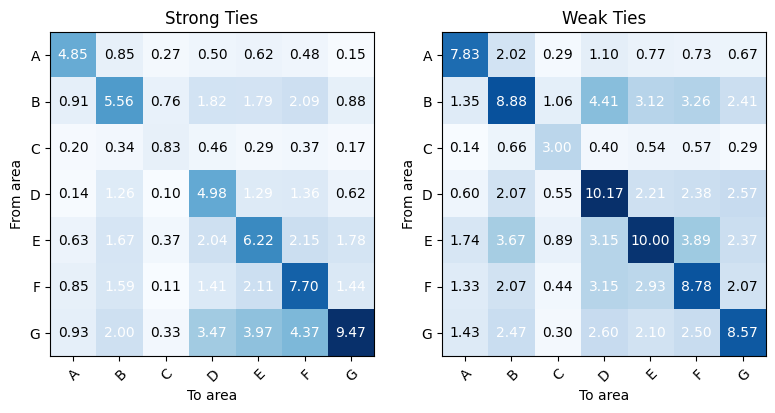

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Function to plot the data
def plot_data(ax, data, title):
    im = ax.imshow(data, cmap='Blues')
    ax.set_title(title)
# add colorbar
#     cbar = ax.figure.colorbar(im, ax=ax)
#     cbar.ax.set_ylabel("Number", rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # set x-ticklabels as A, B, C, D, E, F, G
    ax.set_xticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    # set y-ticklabels as A, B, C, D, E, F, G
    ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text_color = "white" if data[i, j] > np.median(data) else "black"
            ax.text(j, i, f'{data[i, j]:.2f}', ha="center", va="center", color=text_color)


    ax.set_xlabel("To area")
    ax.set_ylabel("From area")

plot_data(ax1, data_strong, "Strong Ties")
plot_data(ax2, data_weak, "Weak Ties")

# 修改字体大小
font = {'family': 'serif', 'weight': 'normal', 'size': 11}
plt.rc('font', **font)

fig.tight_layout()
plt.show()

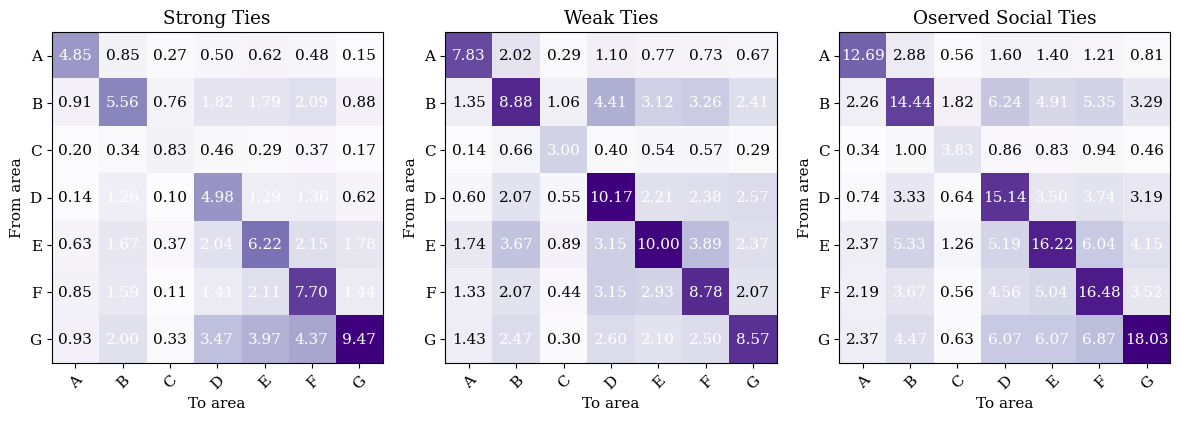

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the social tie matrix
data_social = data_strong + data_weak

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Function to plot the data
def plot_data(ax, data, title):
    im = ax.imshow(data, cmap='Purples')
    ax.set_title(title)
    ax.set_xlabel("To area")
    ax.set_ylabel("From area")
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G'])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text_color = "white" if data[i, j] > np.median(data) else "black"
            ax.text(j, i, f'{data[i, j]:.2f}', ha="center", va="center", color=text_color)

plot_data(ax1, data_strong, "Strong Ties")
plot_data(ax2, data_weak, "Weak Ties")
plot_data(ax3, data_social, "Oserved Social Ties")

# 修改字体大小
font = {'family': 'serif', 'weight': 'normal', 'size': 11}
plt.rc('font', **font)

fig.tight_layout()
plt.show()
